In [39]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import Tool, initialize_agent, AgentType
import os, time
from langchain_core.tools import tool
import tempfile, traceback

In [3]:
GROQ_API_KEY='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'

In [4]:
llm = ChatGroq(model_name="gemma2-9b-it", temperature=0, api_key=GROQ_API_KEY, streaming=True)

In [ ]:
@tool
def search_web(query:str):
    '''Search on the DuckDuckGo Search API for any concept or question you do not know and cannot solve.'''
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

@tool
def plot_graphs(query:str):
    """Used to generate plots, graphs if asked by user."""
    
    plot_llm = ChatGroq(model_name="llama-3.3-70b-versatile", temperature=0.1, api_key=GROQ_API_KEY)
    
    plot_prompt = [SystemMessage(content="You are an expert at generating Matplotlib code. For the given mathematical question or " \
    "equation given, generate appropriate code to plot the function in Matplotlib. Strictly check your provided code. " \
    "Do not generate any extra text. Only give code with correct syntax."), 
    HumanMessage(content=query)]
    
    code = plot_llm.invoke(plot_prompt).content.replace('python', '').replace('`', '')
    
    try:
        with tempfile.TemporaryDirectory() as tmpdir:

            code = code.replace("plt.show()", f"plt.savefig(r'{tmpdir}\plot.png')")

            exec(code, {}, {})

            plot_path = fr"{tmpdir}\plot.png"
            if os.path.exists(plot_path):
                new_path = tempfile.NamedTemporaryFile(delete=False, suffix=".png").name
                os.replace(plot_path, new_path)
                return f"Image generated successfully!"
                # st.chat_message('ai').image(Image.open(new_path), caption="Generated Plot", use_column_width=True)

    except Exception as e:
        return f"Error executing code:\n{traceback.format_exc()}"


agent_executor = initialize_agent(
    tools=[search_web, plot_graphs],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=False,
)

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
C:\Users\devan\AppData\Local\Temp\ipykernel_17180\573368569.py:23: SyntaxWarning: invalid escape sequence '\p'
  code = code.replace("plt.show()", f"plt.savefig(r'{tmpdir}\plot.png')")


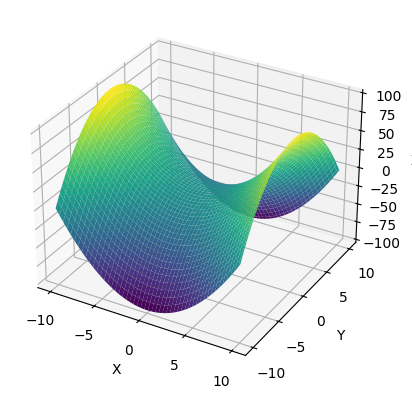

In [64]:
response = agent_executor.invoke("Please generate a 3d graph of z=x^2-y^2")

In [65]:
response

{'input': 'Please generate a 3d graph of z=x^2-y^2',
 'output': 'A 3D graph of z=x^2-y^2 has been generated and saved as C:\\Users\\devan\\AppData\\Local\\Temp\\tmpii6ljuda.png'}